In [1]:
import lmfit
from lmfit.models import LorentzianModel
import numpy as np
from matplotlib import pyplot as plt
import rampy as rp
import scipy
import spectrochempy

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.4.8.dev3© Copyright 2014-2022 - A.Travert & C.Fernandez @ LCS


In [14]:
def raman(name,min,max):
    spectrum = np.genfromtxt(name)
    x_new = np.arange(min, max, 0.5)
    y_new = rp.resample(spectrum[:,0], spectrum[:,1], x_new)
    spectrum_resample = np.vstack((x_new,y_new)).T
    y_smo_10 = rp.smooth(spectrum_resample[:,0],spectrum_resample[:,1],method="whittaker",Lambda=3000,window_length=7)
    spectrum_resample = np.vstack((x_new,y_smo_10)).T
    d = scipy.signal.argrelextrema(spectrum_resample, np.less)
    points = len(d[0])
    bir=np.zeros((points,2))
    for i in range(len(d[0])):
        wavenumber=spectrum_resample[d[0][i]][0]
        bir[i][0]=wavenumber
        bir[i][1]=wavenumber+5
    y_corr, y_base = rp.baseline(spectrum_resample[:,0],spectrum_resample[:,1],bir,'drPLS')
    x = spectrum_resample[:,0]
    x_fit = x[np.where((x > min)&(x < max))]
    y_fit = y_corr[np.where((x > min)&(x < max))]
    spectrum_corr = np.column_stack((x_fit,y_fit))
    ese0 = np.sqrt(abs(y_fit[:,0]))/abs(y_fit[:,0]) # the relative errors after baseline subtraction
    y_fit[:,0] = y_fit[:,0]/np.amax(y_fit[:,0])*10 # normalise spectra to maximum intensity, easier to handle
    spectrum_fit = np.column_stack((x_fit,y_fit))
    sigma = abs(ese0*y_fit[:,0]) #calculate good ese
    return spectrum_resample,spectrum_corr,spectrum_fit,y_base,ese0,sigma
def peak_finder(data):
    peaks_1 = scipy.signal.find_peaks(data.T[1])
    saddles = scipy.signal.argrelmin(data.T[1])
    peaks = np.insert(peaks_1[0],0,saddles[0])
    peaks = np.sort(peaks)
    wavenumbers = []
    signals =[]
    for peak in peaks:
        wavenumbers.append(data.T[0][peak])
        signals.append(data.T[1][peak])
    return wavenumbers,signals

Text(0.5, 0, 'Raman shift, cm$^{-1}$')

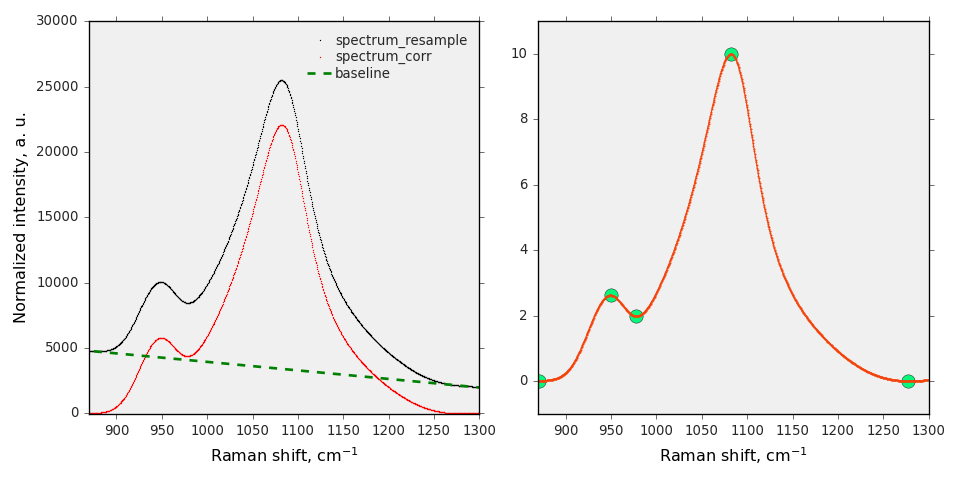

In [23]:
spectrum_resample,spectrum_corr,spectrum_fit,y_base,ese0,sigma =raman('2.dat',840,1300)
wavenumbers,signals=peak_finder(spectrum_fit)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(spectrum_resample[:,0],spectrum_resample[:,1],'ko',markersize=1,label='spectrum_resample')
plt.plot(spectrum_corr[:,0],spectrum_corr[:,1],'ro',markersize=1,label='spectrum_corr')
plt.plot(spectrum_resample[:,0],y_base,'g--',label='baseline',linewidth=2)
plt.ylim(-20,30000)
plt.xlim(870,1300)
plt.xlabel("Raman shift, cm$^{-1}$", fontsize = 12)
plt.ylabel("Normalized intensity, a. u.", fontsize = 12)
plt.legend(fontsize=10)
plt.subplot(1,2,2)
plt.plot(spectrum_fit[:,0],spectrum_fit[:,1],'#F5420a',marker='.',markersize=3,label='spectrum_fit')
plt.scatter(wavenumbers,signals,s=100,c='#0af57c',marker='o')
plt.ylim(-1,11)
plt.xlim(870,1300)
plt.xlabel("Raman shift, cm$^{-1}$", fontsize = 12)


In [24]:
def residual(pars,x,data=None,eps=None):
    model=0.0
    peaks = []
    for i in range(5):
        a = 'a'+ str(i+1)
        f = 'f'+ str(i+1)
        l = 'l'+ str(i+1)
        peak = 'peak'+str(i+1)
        aa = pars[a].value
        ff = pars[f].value
        ll = pars[l].value
        locals()[peak] = rp.gaussian(x,aa,ff,ll)
        model += locals()[peak]
        peaks.append(locals()[peak])
    if data is None:
        return model, peaks # if we don't have data, the function only returns the direct calculation
    if eps is None: # without errors, no ponderation
        return (model - data)
    return (model - data)/eps # with errors, the difference is ponderated

In [25]:
def peak_finder(data):
    peaks_1 = scipy.signal.find_peaks(data.T[1])
    saddles = scipy.signal.argrelmin(data.T[1])
    peaks = np.insert(peaks_1[0],0,saddles[0])
    peaks = np.sort(peaks)
    wavenumbers = []
    signals =[]
    for peak in peaks:
        wavenumbers.append(data.T[0][peak])
        signals.append(data.T[1][peak])
    return wavenumbers,signals

In [26]:
wavenumbers ,signals= peak_finder(spectrum_fit)
def param_gen(n,wavenumbers):
    params = lmfit.Parameters()
    for i in range(n):
        a = 'a'+ str(i+1)
        f = 'f'+ str(i+1)
        l = 'l'+ str(i+1)
        wavenumber = wavenumbers[i]
        params.add_many((a, 2, True , 0 , None, None),
                        (f,wavenumber,True,wavenumber-200,wavenumber+200,None),
                        (l, 30 , True , 0 , None, None))
    return params
params= param_gen(5,wavenumbers)

In [27]:
params = lmfit.Parameters()
#               (Name,  Value,  Vary,   Min,  Max,  Expr)
params.add_many(('a1',   2.4,   True,  0,      None,  None),
                ('f1',   946,   True, 910,    970,  None),
                ('l1',   26,   True,  20,      50,  None),
                ('a2',   3.5,   True,  0,      None,  None),
                ('f2',   1026,  True, 990,   1070,  None),
                ('l2',   39,   True,  20,   55,  None),
                ('a3',   8.5,    True,    7,      None,  None),
                ('f3',   1082,  True, 1070,   1110,  None),
                ('l3',   31,   True,  25,   35,  None),
                ('a4',   2.2,   True,  0,      None,  None),
                ('f4',   1140,  True, 1110,    1160,  None),
                ('l4',   35,   True,  20,   50,  None),
                ('a5',   2.,   True,  0,      None,  None),
                ('f5',   1211,  True, 1180,   1220,  None),
                ('l5',   28,   True,  20,   45,  None))

In [28]:
params['f1'].vary = False
params['f2'].vary = False
params['f3'].vary = False
params['f4'].vary = False
params['f5'].vary = False
algo = 'powell'
result = lmfit.minimize(residual, params, method = algo, args=(spectrum_fit[:,0], spectrum_fit[:,1]))
params['f1'].vary = True
params['f2'].vary = True
params['f3'].vary = True
params['f4'].vary = True
params['f5'].vary = True
result2 = lmfit.minimize(residual, params, method = algo, args=(spectrum_fit[:,0], spectrum_fit[:,1]))
model = lmfit.fit_report(result2.params)
yout, peaks= residual(result2.params,spectrum_fit[:,0])

Text(0, 0.5, 'Normalized intensity, a. u.')

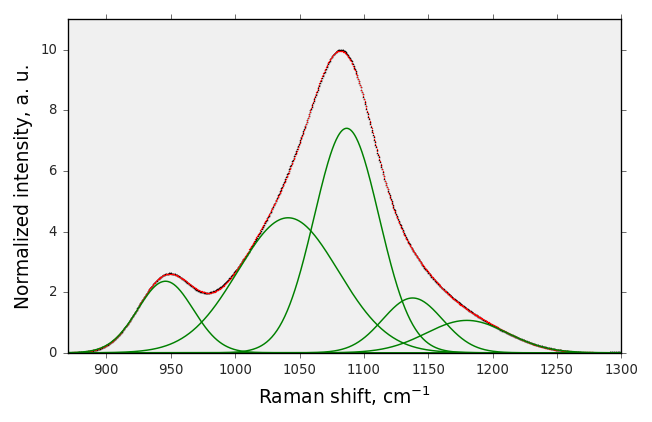

In [29]:
plt.figure()
plt.plot(spectrum_fit[:,0],spectrum_fit[:,1],'k*',markersize=2)
plt.plot(spectrum_fit[:,0],yout,'ro',markersize=1)
for i in range(len(peaks)):
    plt.plot(spectrum_fit[:,0],peaks[i],'g-',linewidth=1.1)
plt.xlim(870,1300)
plt.ylim(0,11)
plt.xlabel("Raman shift, cm$^{-1}$", fontsize = 14)
plt.ylabel("Normalized intensity, a. u.", fontsize = 14)